<a href="https://colab.research.google.com/github/RAIHANRABBY/studymart/blob/main/customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/customer churn/Customer-Churn-Prediction.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


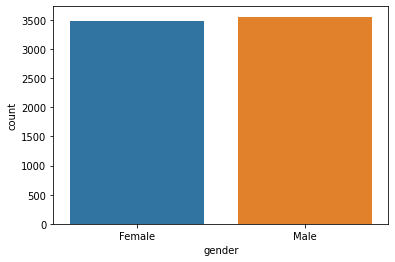

In [7]:
sns.countplot(df['gender'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


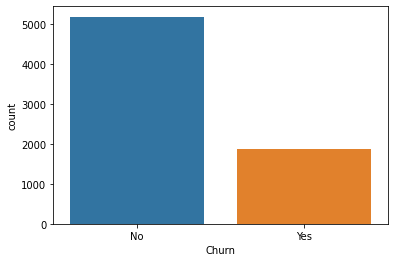

In [8]:
sns.countplot(df['Churn'])

In [9]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

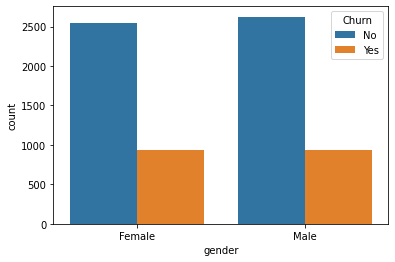

In [10]:
sns.countplot(x='gender',hue='Churn',data=df)

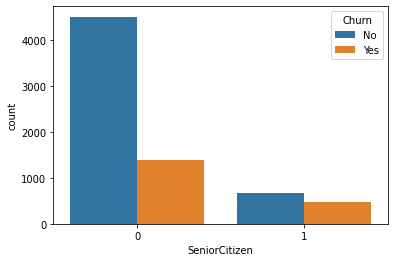

In [11]:
sns.countplot(x='SeniorCitizen',hue='Churn',data=df)

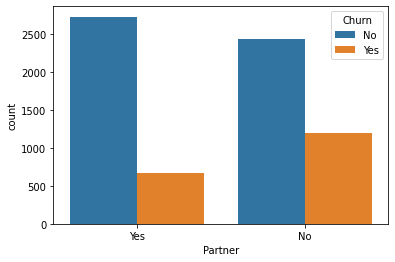

In [12]:
sns.countplot(x='Partner',hue='Churn',data=df)

In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
data_set=df.drop('customerID',axis=1,inplace=True)

In [15]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [16]:
for col in df.columns:
    if df[col].dtype==np.number:
        continue
    else:
        df[col]=LE.fit_transform(df[col])

In [17]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [18]:
x=df.drop('Churn',axis=1)
y=df['Churn']

In [19]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
feature_x=SS.fit_transform(x)

In [20]:
feature_x

array([[-1.00955867, -0.44014635,  1.03453023, ...,  0.39855772,
        -1.16032292, -0.39860759],
       [ 0.99053183, -0.44014635, -0.96662231, ...,  1.33486261,
        -0.25962894, -0.94876238],
       [ 0.99053183, -0.44014635, -0.96662231, ...,  1.33486261,
        -0.36266036, -1.64188328],
       ...,
       [-1.00955867, -0.44014635,  1.03453023, ...,  0.39855772,
        -1.1686319 , -0.13968008],
       [ 0.99053183,  2.27197156,  1.03453023, ...,  1.33486261,
         0.32033821, -0.31653445],
       [ 0.99053183, -0.44014635, -0.96662231, ..., -1.47405205,
         1.35896134,  1.13801338]])

## train test splite

In [21]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(feature_x,y,test_size=.30,random_state=45)

In [22]:
xtrain

array([[-1.00955867, -0.44014635, -0.96662231, ..., -0.53774716,
        -1.33148801, -1.22939957],
       [ 0.99053183, -0.44014635,  1.03453023, ...,  0.39855772,
        -0.62688608, -1.40678345],
       [-1.00955867,  2.27197156,  1.03453023, ..., -1.47405205,
         0.78730317, -0.7967947 ],
       ...,
       [-1.00955867, -0.44014635,  1.03453023, ...,  0.39855772,
         0.62610886,  0.10389182],
       [-1.00955867, -0.44014635, -0.96662231, ...,  0.39855772,
         0.18240906, -0.70148395],
       [ 0.99053183, -0.44014635, -0.96662231, ..., -1.47405205,
        -1.47938794, -0.21857619]])

# logistic regression 

In [23]:
from sklearn.linear_model import LogisticRegression
LOR=LogisticRegression()

In [24]:
LOR.fit(xtrain,ytrain)

LogisticRegression()

In [25]:
LOR.score(xtest,ytest)

0.8069096071935636

In [26]:
from sklearn.metrics import accuracy_score
pred=LOR.predict(xtest)

In [27]:
accuracy_score(ytest,pred)

0.8069096071935636

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,pred)

array([[1408,  165],
       [ 243,  297]])

In [29]:
from ImpactLearning import Classifier

In [31]:
il = Classifier()
il.fit(xtrain, ytrain,CCapacity=1, num_classes=3, optimizer="GD", loss_function="CategoricalCrossentropy")
il.train(epochs = 10000, lr=0.001, progress_per=100)

Epoch: 100, loss: 0.895271, train_accuracy: 0.699391 
Epoch: 200, loss: 0.874437, train_accuracy: 0.710142 
Epoch: 300, loss: 0.855141, train_accuracy: 0.717647 
Epoch: 400, loss: 0.836771, train_accuracy: 0.722921 
Epoch: 500, loss: 0.819289, train_accuracy: 0.727383 
Epoch: 600, loss: 0.802667, train_accuracy: 0.733469 
Epoch: 700, loss: 0.786874, train_accuracy: 0.738540 
Epoch: 800, loss: 0.771872, train_accuracy: 0.743002 
Epoch: 900, loss: 0.757632, train_accuracy: 0.746450 
Epoch: 1000, loss: 0.744117, train_accuracy: 0.751318 
Epoch: 1100, loss: 0.731296, train_accuracy: 0.754564 
Epoch: 1200, loss: 0.719134, train_accuracy: 0.758012 
Epoch: 1300, loss: 0.707601, train_accuracy: 0.761460 
Epoch: 1400, loss: 0.696663, train_accuracy: 0.763894 
Epoch: 1500, loss: 0.686290, train_accuracy: 0.765923 
Epoch: 1600, loss: 0.676450, train_accuracy: 0.767951 
Epoch: 1700, loss: 0.667120, train_accuracy: 0.769574 
Epoch: 1800, loss: 0.658266, train_accuracy: 0.770994 
Epoch: 1900, loss: 